# Packages and path

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline
import matplotlib.pyplot as plt
import sklearn
import scipy

Populating the interactive namespace from numpy and matplotlib


In [3]:
chemin = "drive/MyDrive/BME/Artificial_Intelligence_in_Data_Science/class_3/"
np.random.seed(12347)

# Reading, cleaning and transformation of dataframe

In [4]:
data = pd.read_csv(chemin+'titanic.csv', sep = ";")
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Age: Create columns: 0, 1-10, 11-20, 21-30, 31-40, 41-50, 50-1000, put 1 in the column if the passengers age falls into this group 0 otherwise

Gender: 0 for male, and 1 for female

Passenger class: Create columns 1, 2, 3, put 1 in the column in the class of the passenger and zero in the others

Number of Parents/Children Aboard (parch): 0 if zero and 1 if nonzero

Number of Siblings/Spouses Aboard (sibsp): 0 if zero and 1 if nonzero

In [5]:
def cleaning(data):
  data = data.dropna(subset = ["Age","Sex",'Pclass','Survived'])
  return data

In [6]:
def create_gender(data):
  data['Gender'] = np.array((data['Sex'] == 'female'),dtype=int)
  return data

In [7]:
print(data.shape)
data = cleaning(data)
print(data.shape)

(891, 12)
(714, 12)


In [8]:
data = create_gender(data)
data[:8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1


In [9]:
final_data = data[['Survived','Pclass','Gender','Age']]
final_data[:8]

,Survived,Pclass,Gender,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
6,0,1,0,54.0
7,0,3,0,2.0
8,1,3,1,27.0


# Creation of the random dataframe

In [10]:
N = len(final_data)
x = final_data

In [11]:
#create random synthetic data
NY = N

Survived = np.random.randint(2, size=NY)  
Pclass = np.array(np.random.uniform(1,4,NY),dtype=int)
Gender = np.random.randint(2, size=NY)

high = 80
Age = np.random.randint(high, size=NY)  

y = pd.DataFrame({"Survived":Survived,"Pclass":Pclass,"Gender":Gender,"Age":Age})
y

,Survived,Pclass,Gender,Age
0,0,2,0,32
1,1,2,1,13
2,0,2,0,33
3,0,1,1,30
4,0,1,0,72
...,...,...,...,...
709,1,2,0,34
710,1,2,0,47
711,1,1,1,10
712,0,3,0,21


In [12]:
z = np.zeros((NY+N,4),dtype=float)
t = np.zeros(NY+N,dtype=int)
z[:N] = x
z[N:] = y
t[N:] = 1

# Creation of the co occurence matrix with Random Forest

In [13]:
def find_pairs(list_numbers):
  co_occurence = np.zeros((len(list_numbers),len(list_numbers)))

  for i in range(len(list_numbers)):
    for j in range(len(list_numbers)):
      if list_numbers[i] == list_numbers[j] and i!=j:
         co_occurence[i][j]+=1

  co_occurence = pd.DataFrame(co_occurence)

  return co_occurence

In [14]:
def apply_decision_tree_bootstrap(x_train,y_train, x_test, ratio_bootstrap=0.3):
  np.random.seed(None)
  sequence = range(len(x_train)) 
  smp = np.random.choice(sequence, int(ratio_bootstrap*len(sequence)), replace=False)

  new_z = z[smp]
  new_t = t[smp]

  clf = tree.DecisionTreeClassifier()
  clf_fitted = clf.fit(new_z,new_t)

  np.random.seed(12347)
  return clf_fitted.apply(x_test) 

In [15]:
nb_of_trees_in_forest = 500
co_occurence = find_pairs(apply_decision_tree_bootstrap(z,t,x))

for i in range(nb_of_trees_in_forest-1):
  co_occurence.iloc[:,:] = co_occurence.iloc[:,:] + find_pairs(apply_decision_tree_bootstrap(z,t,x)).iloc[:,:]
  
co_occurence

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713
0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,324.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,334.0,22.0,0.0,0.0,0.0,0.0,9.0,22.0,11.0,334.0,0.0,0.0,...,265.0,5.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,25.0,0.0,6.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,2.0,0.0,1.0,324.0,320.0,0.0,0.0,10.0,41.0,1.0,154.0,0.0,1.0,0.0,0.0,10.0
1,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,3.0,0.0,18.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,5.0,0.0,0.0,0.0,17.0,4.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,48.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,17.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,351.0,0.0,0.0,0.0,2.0,57.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,7.0,281.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,1.0,86.0,0.0,0.0,7.0,7.0,0.0,0.0,432.0,0.0,1.0,33.0,3.0,1.0,0.0,0.0,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,332.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,1.0,0.0,31.0,0.0,0.0,1.0,0.0,0.0,100.0,0.0,1.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,...,1.0,0.0,1.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,69.0,0.0,46.0,22.0,0.0,10.0,0.0,5.0,0.0,24.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,298.0,9.0,0.0,0.0,0.0,11.0,2.0
711,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,214.0,0.0,0.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,5.0,0.0,0.0,11.0,0.0,0.0,0.0


The graph doesn't show a lot, we will use linkage.

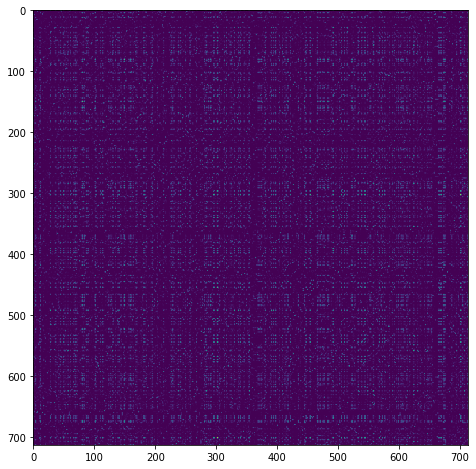

In [16]:
comat = co_occurence

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

im = ax.imshow(comat)
plt.show()

In [17]:
normalized_co_occurence = co_occurence/np.mean(co_occurence,axis=1)
normalized_co_occurence

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713
0,0.000000,0.000000,0.0,0.000000,0.284224,0.0,0.209384,0.000000,0.0,0.0,0.0,7.049703,0.247712,0.242034,0.0,0.209384,0.000000,0.000000,0.000000,0.209384,0.000000,0.0,0.000000,0.512195,0.000000,0.0,0.000000,0.000000,8.359073,2.493333,0.000000,0.000000,0.000000,0.0,1.369273,2.493333,1.987851,8.359073,0.000000,0.000000,...,6.528535,0.177250,0.284224,0.091727,0.266916,0.0,0.0,0.000000,0.000000,0.745303,0.000000,0.0,0.000000,0.208670,3.474114,0.000000,0.775244,0.000000,0.000000,0.000000,0.0,3.401215,0.000000,0.000000,0.164592,0.000000,0.209384,7.049703,6.955463,0.0,0.000000,0.288298,5.282209,0.091727,4.899782,0.000000,0.099180,0.000000,0.000000,0.351534
1,0.000000,0.000000,0.0,5.735900,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.284462,0.000000,0.000000,0.0,14.110672,0.000000,0.508185,0.0,0.000000,0.240161,0.000000,0.000000,0.000000,0.336475,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.455067,0.106440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5.366927,0.0,0.000000,0.000000,0.000000,0.798658,0.000000,3.490494,0.000000,0.000000,0.0,0.000000,2.031294,0.000000,0.000000,0.108116,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.344761,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56.187366,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.464239,0.000000,0.000000,0.837537,0.000000,0.0,4.233202,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.300252,0.000000,0.364844,0.0,1.825698,0.000000,0.000000,0.000000,0.000000,1.490161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.490605,0.000000,0.0,38.087734,0.000000,0.000000,0.000000,0.000000,0.000000,3.915905,0.000000,0.0,0.212576,0.000000,0.000000,0.000000,1.837977,0.837537,0.000000,0.000000,0.0,4.594435,0.000000,0.000000,0.000000,0.095450,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,9.127031,0.0,0.000000,0.056845,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.579557,4.835857,0.000000,0.000000,0.0,0.940711,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.227533,0.745081,...,0.000000,0.000000,0.056845,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.391425,0.0,0.000000,0.000000,0.000000,0.266219,0.000000,0.581749,0.261060,0.000000,0.0,0.000000,0.338549,0.371681,0.000000,0.324349,0.000000,0.000000,0.000000,0.0,0.124174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171593,0.000000,0.000000
4,0.237406,0.000000,0.0,0.238996,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.152308,10.868381,0.000000,0.0,0.000000,0.464239,6.126449,0.284462,0.000000,0.000000,0.0,0.470356,0.000000,0.000000,0.0,0.000000,0.000000,0.175190,0.000000,0.000000,1.009425,0.000000,0.0,0.000000,0.000000,0.000000,0.175190,0.000000,0.000000,...,0.172452,9.961472,14.211218,0.091727,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,10.120507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.403001,0.000000,0.371681,7.077455,0.000000,0.000000,0.152308,0.152151,0.0,0.000000,12.454494,0.000000,0.091727,1.049953,1.034283,0.099180,0.000000,0.000000,10.756930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.000000,0.190146,0.0,0.000000,0.085267,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.650245,0.000000,0.0,

# Use of linkage to find clusters

In [18]:
def create_hist_for_cluster(normalized_co_occurence,t):
  linked = linkage(normalized_co_occurence, 'average',metric="euclidean")
  clusters = scipy.cluster.hierarchy.fcluster(linked,t,criterion='distance')
  sns.histplot(data=clusters)
  plt.show()
  return clusters

We see cluster forming when we change t to the point that there is just one cluster. The goal is then to take the best t. For t, it seems we have a real good cluster that is almost the halt of the dataset. 

20


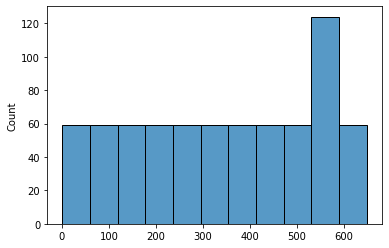

40


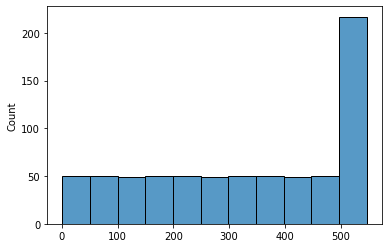

60


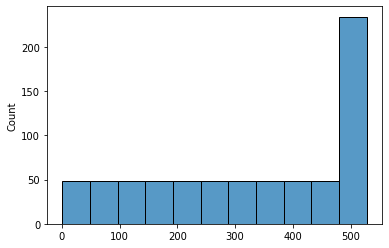

80


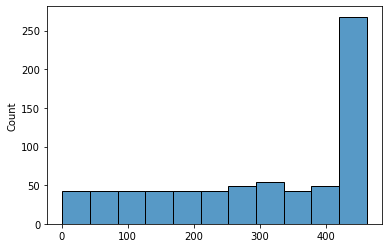

100


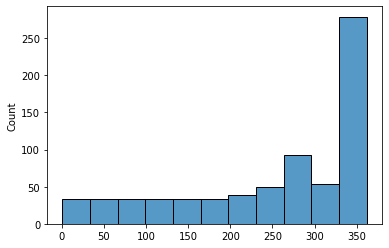

120


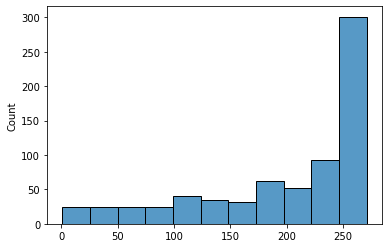

140


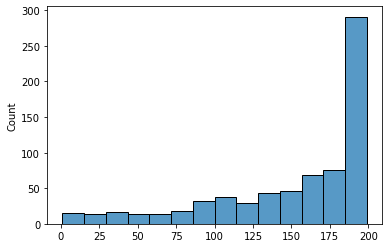

160


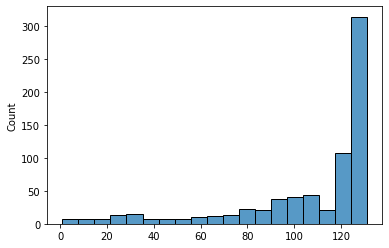

180


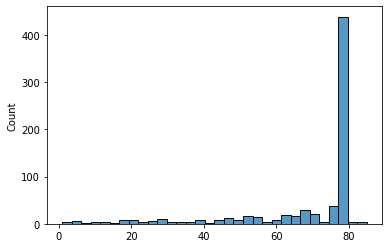

200


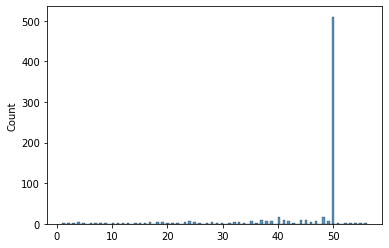

220


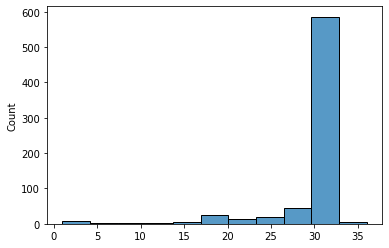

240


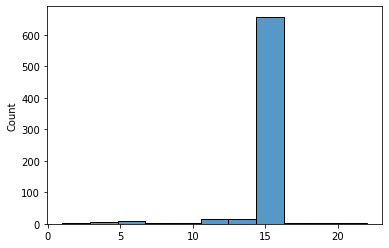

260


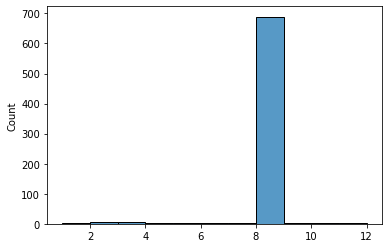

280


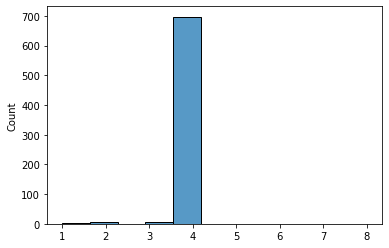

300


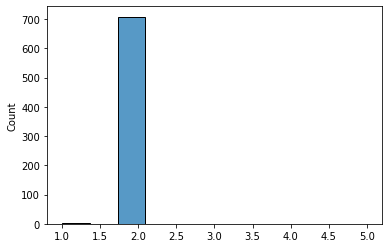

320


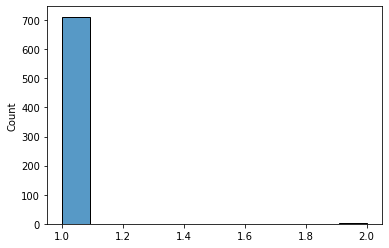

340


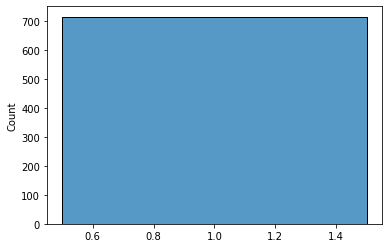

360


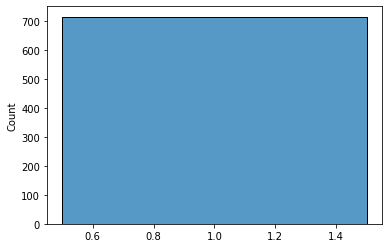

380


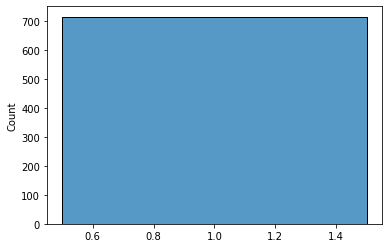

In [19]:
for t in range(20,400,20):
  print(t)
  cl = create_hist_for_cluster(normalized_co_occurence,t)